## 42577 Introduction to Business Analytics

# **Project: Airbnb rentals data exploration challange**

##  <span style='color:green'> 1. Introduction </span> <br>

##  <span style='color:green'> 2. Data analysis and Visualization </span> <br>

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the dataset from the CSV file
dataset = pd.read_csv('listings_CPH.csv')

In [4]:
# Dispaly few variables
dataset.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,6983,26057,26473,29118,31094,32379,32841,33680,37159,38499
name,Copenhagen 'N Livin',Lovely house - most attractive area,City Centre Townhouse Sleeps 1-10 persons,Best Location in Cool Istedgade,"Beautiful, spacious, central, renovated Penthouse","165 m2 artist flat on Vesterbro, with 2 bathr...",Cozy flat for Adults/Quiet for kids,Best location on Vesterbro/Cph,Unique space on greatest location,0 min. from everything in Cph.
host_id,16774,109777,112210,125230,129976,140105,142143,145671,160390,122489
host_name,Simon,Kari,Julia,Nana,Ebbe,Lise,Anders & Maria,Mette,Jeanette,Christina
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave,sterbro,Vesterbro-Kongens Enghave,Indre By,Indre By
latitude,55.68641,55.69307,55.67602,55.67023,55.666602,55.672638,55.71176,55.66631,55.68547,55.684288
longitude,12.54741,12.57649,12.5754,12.55504,12.555283,12.552493,12.57091,12.54555,12.56543,12.573019
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,898,2600,3250,725,1954,1280,617,1000,2916,1900


In [17]:
# Retrive useful information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13815 entries, 0 to 13814
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13815 non-null  int64  
 1   name                            13815 non-null  object 
 2   host_id                         13815 non-null  int64  
 3   host_name                       13814 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   13815 non-null  object 
 6   latitude                        13815 non-null  float64
 7   longitude                       13815 non-null  float64
 8   room_type                       13815 non-null  object 
 9   price                           13815 non-null  int64  
 10  minimum_nights                  13815 non-null  int64  
 11  number_of_reviews               13815 non-null  int64  
 12  last_review                     

In [18]:
# Observe wether null values are present
dataset.isnull().any()

id                                False
name                              False
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
dtype: bool

***True indicates a null value and False indicates there is no null value. We can observe that there are 5 columns containing null values. `host_name` column is missing one data point, `last_review` and `reviews_per_month`columns are missing 1645 data points. We can notice that column `neighbourhood_group` and `license` are containing no data points at all.***

***In order to remove the null values we are replacing them using mode and mean.***

In [19]:
# Replace missing values
dataset["host_name"].fillna(dataset["host_name"].mode()[0], inplace = True)
dataset["last_review"].fillna(dataset["last_review"].mode()[0], inplace = True)
dataset["reviews_per_month"].fillna(dataset["reviews_per_month"].mean(), inplace = True)
# Delete columns with no recordings
del dataset["neighbourhood_group"]
del dataset["license"]

In [25]:
# Convert string date to datetime object
dataset.last_review = pd.to_datetime(dataset.last_review)

In [8]:
dataset.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.686410,12.547410,Entire home/apt,898,3,172,2022-06-21,1.08,1,0,4,NaN
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.693070,12.576490,Entire home/apt,2600,4,59,2022-08-09,0.55,1,303,8,NaN
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,NaN,Indre By,55.676020,12.575400,Entire home/apt,3250,3,300,2022-09-10,2.06,3,56,7,NaN
3,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,24,2022-08-04,0.16,1,59,2,NaN
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,2022-08-22,0.13,1,0,2,NaN
5,32379,"165 m2 artist flat on Vesterbro, with 2 bathr...",140105,Lise,NaN,Vesterbro-Kongens Enghave,55.672638,12.552493,Entire home/apt,1280,3,80,2022-08-13,0.54,2,60,5,NaN
6,32841,Cozy flat for Adults/Quiet for kids,142143,Anders & Maria,NaN,sterbro,55.711760,12.570910,Entire home/apt,617,100,7,2016-09-15,0.05,1,281,0,NaN
7,33680,Best location on Vesterbro/Cph,145671,Mette,NaN,Vesterbro-Kongens Enghave,55.666310,12.545550,Entire home/apt,1000,6,71,2019-03-14,0.48,1,312,0,NaN
8,37159,Unique space on greatest location,160390,Jeanette,NaN,Indre By,55.685470,12.565430,Entire home/apt,2916,5,11,2017-08-22,0.07,1,0,0,NaN
9,38499,0 min. from everything in Cph.,122489,Christina,NaN,Indre By,55.684288,12.573019,Entire home/apt,1900,14,15,2022-09-17,0.10,1,87,6,NaN


In [7]:
# Sort the dataset based on the price  
dataset.sort_values(by='price', ascending=True)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
7786,46325896,citizenM Copenhagen Radhuspladsen,374968389,CitizenM,NaN,Indre By,55.677323,12.565638,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN
7183,43078527,First Hotel Kong Frederik,316080552,First Hotel Kong Frederik,NaN,Indre By,55.677570,12.567790,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN
6545,39000504,Cosy room in fabulous condo!,25580883,Annabella,NaN,Nrrebro,55.689410,12.562600,Private room,79,1,28,2022-09-15,0.77,2,38,22,NaN
6876,41285362,Copenhagen loft apartment at Nørrebro,116485169,Olivia,NaN,Bispebjerg,55.699910,12.536020,Entire home/apt,113,1,0,NaN,NaN,1,0,0,NaN
7986,48652028,Room for rent in shared accommodation,225782385,Nitesh,NaN,Bispebjerg,55.703160,12.534220,Private room,120,1,0,NaN,NaN,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,44226456,Grøn landsbyidyl i hjertet af København,70535897,Nanna,NaN,sterbro,55.702290,12.574260,Entire home/apt,41800,3,5,2021-08-16,0.19,2,177,0,NaN
7494,44224836,Cozy and bright 2-room apartment with big balcony,83120126,Martin,NaN,Bispebjerg,55.707100,12.525490,Entire home/apt,44000,500,1,2020-08-14,0.04,1,0,0,NaN
2902,16397010,Cosy and spacey apartment!,33025844,Jacob,NaN,Frederiksberg,55.689210,12.518130,Entire home/apt,58000,14,16,2020-03-15,0.23,1,0,0,NaN
5473,33108071,not available for bookings due to sale,44675877,Christian,NaN,Vesterbro-Kongens Enghave,55.657810,12.561920,Entire home/apt,62000,27,0,NaN,NaN,1,358,0,NaN


In [29]:
# Search for duplicate rows in the dataset 
duplicate_check = dataset.duplicated()
duplicate_check

0        False
1        False
2        False
3        False
4        False
         ...  
13810    False
13811    False
13812    False
13813    False
13814    False
Length: 13815, dtype: bool

By using the function dataset.duplicated() the values of the given dataset are passed to the parameters for searching duplicate rows. All values in the printed boolean series are 'False' which indicates that there are no duplicated rows in our dataset. Each row in the listing is unique.

In order to perform further analysis in our dataset we need to properly prepare the data. Defining outliers is an essential part of the data analytics process. The outliers are the extreme values within the dataset. That means the outlier data points vary greatly from the expected values—either being much larger or significantly smaller. One way to spot the outliers is using the function .describe() which generates a statistical summary. Outliers in the column of price will influence the analysis so this is where we will focus on

In [6]:
#Statistical summary of the column price
dataset['price'].describe()

count    13815.000000
mean      1205.878972
std       1433.143149
min          0.000000
25%        729.000000
50%        995.000000
75%       1368.500000
max      64900.000000
Name: price, dtype: float64

We can notice that the max value is 64900 which is a large number compare to the mean which is only 1205, this indicates that the max value is an outlier. So we decided to use a data visualization technique to spot the outliers in detail. 
Box plots are useful because they show minimum and maximum values, the median, and the interquartile range of the data. 

<AxesSubplot:>

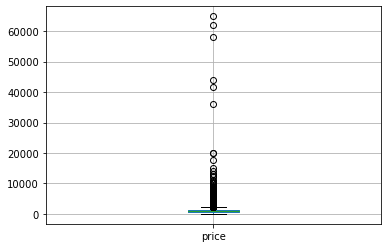

In [21]:
#Create a boxplot to spot the outliers 
fig = dataset.boxplot(column='price')
fig

The thick line in the middle represents the median. The bottom line is the 25% percentile and the top line is the 75% percentile value of the data. The points that lie outside these lines, that is, (1.5 x IQR) in both directions are generally considered as outliers. 

In [95]:
# Count the outliers that are above the 75% 
print("Number of outliers found above the 75%:")
len(dataset[dataset.price>1368.5])

Number of outliers found above the 75%:


3454

In [96]:
#Count the outliers that are below the 25% (we used the values shown from the statistical summary)
print("Number of outliers found below the 25%:")
len(dataset[dataset.price<729])

Number of outliers found below the 25%:


3449

#  <span style='color:green'> 3. Exploratory Component </span> <br>

Starting the dataset exploration, observing useful information we can use later in the analysis. 

In [42]:
# Categorize the number of listings based on the room type 
room_type_count = dataset.room_type.value_counts()
room_type_count

Entire home/apt    12230
Private room        1551
Shared room           19
Hotel room            15
Name: room_type, dtype: int64

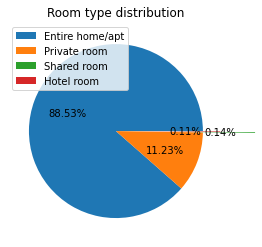

In [94]:
# Visualize the room type distribution 
explode = (0, 0, 0.6, 0.2)
plt.pie(room_type_count, explode=explode, autopct='%.2f%%')
plt.legend(room_type_count.index, loc = "upper left")
plt.title("Room type distribution")
plt.show()

##  <span style='color:green'> 4. Prediction Challange </span> <br>

##  <span style='color:green'> 5. Conclusions </span> <br>